In [101]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preparation

In [102]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep=';')
df
#df = df.drop(['id'], axis=1)

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2,4,58138.0,0,58,7.0,0.0,1.0,64.0,3314,1617.000000,25.0
1,2,4,46344.0,1,38,5.0,0.0,0.0,67.0,2764,27.000000,6.0
2,2,5,71613.0,0,26,4.0,0.0,0.0,56.0,2963,776.000000,21.0
3,2,5,26646.0,1,26,6.0,0.0,0.0,37.0,2790,53.000000,8.0
4,4,3,58293.0,1,94,5.0,0.0,0.0,40.0,2812,422.000000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,5.0,0.0,0.0,54.0,3032,1294.524192,18.0
2236,4,5,64014.0,2,56,7.0,0.0,1.0,75.0,2670,444.000000,22.0
2237,2,2,56981.0,0,91,6.0,0.0,1.0,40.0,2806,1241.000000,19.0
2238,3,5,69245.0,0,8,3.0,0.0,0.0,65.0,2807,843.000000,23.0


Из категориальных переменных в датасете есть: статус, обьразование, все отклики на стратегию. эти данные уже есть закодированными, еще на этапе подготовки данных.

In [103]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.393750,3.729911,51908.479018,0.444196,49.109375,5.297486,0.002799,0.424309,52.146625,3004.582143,599.622367,14.763082
std,1.124797,1.076277,21060.555522,0.538398,28.962453,2.343171,0.028777,0.802260,11.768185,202.122512,593.484182,7.546730
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2651.000000,5.000000,0.000000
25%,2.000000,3.000000,35538.750000,0.000000,24.000000,3.000000,0.000000,0.000000,44.000000,2831.750000,68.750000,8.000000
50%,2.000000,4.000000,51741.500000,0.000000,49.000000,6.000000,0.000000,0.000000,51.000000,3006.500000,395.500000,15.000000
75%,3.000000,5.000000,68289.750000,1.000000,74.000000,7.000000,0.000000,1.000000,62.000000,3180.000000,1034.000000,21.000000
max,4.000000,7.000000,127766.000000,2.000000,99.000000,12.596453,0.298549,3.118505,88.146405,3350.000000,2497.622533,35.000000


In [104]:
df.loc[(df['all_Response']>= 1),'all_Response'] = 1

<AxesSubplot:ylabel='Frequency'>

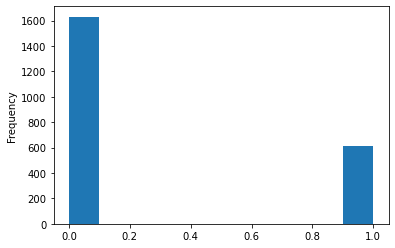

In [101]:
df['all_Response'].plot(kind = 'hist')

Выборка достаточно несбалансированная, отношение приблизительно 1 к 3м. Однако это не столь критичное отношение, чтобы ради этого воспользоваться методом under sampling и уменьшить выборку. Изначала всего 2240 наблюдений, а объектов класса 1 около 500 лишь, то уменьшение выборки будет в 2 раза, что, на мой взгляд, может отразиться на результаты моделирования пагубно.

In [105]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0,1,2,3,4,5,6,8,9,10,11]] 
y = df['all_Response']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [106]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

## Feature Selection

In [107]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.599922
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.012   
Dependent Variable: all_Response     AIC:              2172.1207
Date:               2021-11-28 13:06 BIC:              2232.5226
No. Observations:   1792             Log-Likelihood:   -1075.1  
Df Model:           10               LL-Null:          -1061.9  
Df Residuals:       1781             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0555     0.0536    1.0350   0.3007   -0.0496    0.1606
x2       -0.0055     0.0519   -0.1062   0.9155   -0.1072    0.0962
x3 

Исходя из этой таблицы, похоже, что значимы лишь:кол-во визитов в месяц, кол-во жалоб за последние 2 года, сумма покупок и кол-во покупок. Что косвенно указывает на то нравится ли покупателям данный магазин, его ассортимент, цены и т.д.

In [108]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[False False False False False False False False False  True False]
[ 6 11  5  8  3  2  7 10  9  1  4]


## Fitting Logistic Regression

In [109]:
# Leaving only Selected Features
X_train_select=X_train[:,[False, False, False, False, True, True, False, False, False,  True, True]]
X_test_select=X_test[:,[False, False, False, False, True, True, False, False, False,  True, True]]

In [110]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [111]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(2)

0.79

Результат достаточно хороший. 79% распознаны моделью верно.

In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[309  31]
 [ 61  47]]


Проанализировав матрицу, можем сказать, что неверно распознанных элементов 92. 
Точность модели = 79.5%
Специфичность = 91%
Чувствительность = 43.5% 
Таким образом, можем сказать о том, что данная модель лучше выявляет тех клентов, которых интересуют условия той стратегии.

In [73]:
import pickle
obj = {'X_train': X_train[:,[False, False, False, False, True, True, False, False, False,  True, True]], 
       'X_test': X_test[:,[False, False, False, False, True, True, False, False, False,  True, True]],
       'y_train': y_train,
       'y_test': y_test}
output = open('data_klast.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()